# Notebook to retrieve imagery matching drone pass timesteps and area

In [113]:
%matplotlib inline
from datacube.helpers import write_geotiff
from datacube.storage import masking
from datacube.utils.geometry import CRS, point
from datacube import Datacube
from datetime import datetime

import dask
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import xarray as xr


# Point this to where you have the algorithms from the dea-notebooks/algorithms saved
sys.path.append(os.path.abspath('../../Scripts'))
from dea_datahandling import load_ard
from dea_plotting import rgb

# Point this to where you have the algorithms from the dea-notebooks/algorithms saved
sys.path.append(os.path.abspath('../../10_Scripts'))
from dea_datahandling import load_ard
from dea_plotting import rgb

# Connect to datacube
dc = Datacube(app='Sentinel2 pixelgrid')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
# Create a reusable query
query = {
    #-27.521489, 153.463994 -27.556528, 153.507053
    'x': (153.39, 153.58),
    'y': (-27.38, -27.74),
    'time': ('2019-09', '2019-09-10'),
    'measurements': ['nbart_blue', 'nbart_green','nbart_red', 'nbart_nir_1','nbart_swir_2','nbart_swir_3'],
    'output_crs': 'EPSG:3577',
    'resolution': (-10, 10),
    'group_by': 'solar_day'
}

In [55]:
# Load available data from both Sentinel 2 satellites
ds = load_ard(dc=dc,
              products=['s2a_ard_granule', 's2b_ard_granule'],
              min_gooddata=0,
              **query)

Loading s2a_ard_granule data
    Applying pixel quality mask
Loading s2b_ard_granule data
    Applying pixel quality mask
Combining and sorting data
    Masking out invalid values
    Returning 4 observations 


In [56]:
ds

<xarray.Dataset>
Dimensions:       (time: 4, x: 2504, y: 4292)
Coordinates:
  * y             (y) float64 -3.144e+06 -3.144e+06 ... -3.187e+06 -3.187e+06
  * x             (x) float64 2.073e+06 2.073e+06 ... 2.099e+06 2.099e+06
  * time          (time) datetime64[ns] 2019-09-02T00:02:41.024000 ... 2019-09-08T23:52:41.024000
Data variables:
    nbart_blue    (time, y, x) float32 457.0 457.0 469.0 ... 379.0 407.0 396.0
    nbart_green   (time, y, x) float32 389.0 404.0 403.0 ... 253.0 297.0 295.0
    nbart_red     (time, y, x) float32 108.0 114.0 101.0 ... 197.0 189.0 198.0
    nbart_nir_1   (time, y, x) float32 46.0 56.0 49.0 46.0 ... 152.0 172.0 161.0
    nbart_swir_2  (time, y, x) float32 27.0 27.0 28.0 28.0 ... 106.0 106.0 106.0
    nbart_swir_3  (time, y, x) float32 22.0 22.0 18.0 18.0 ... 95.0 94.0 94.0
Attributes:
    crs:      EPSG:3577

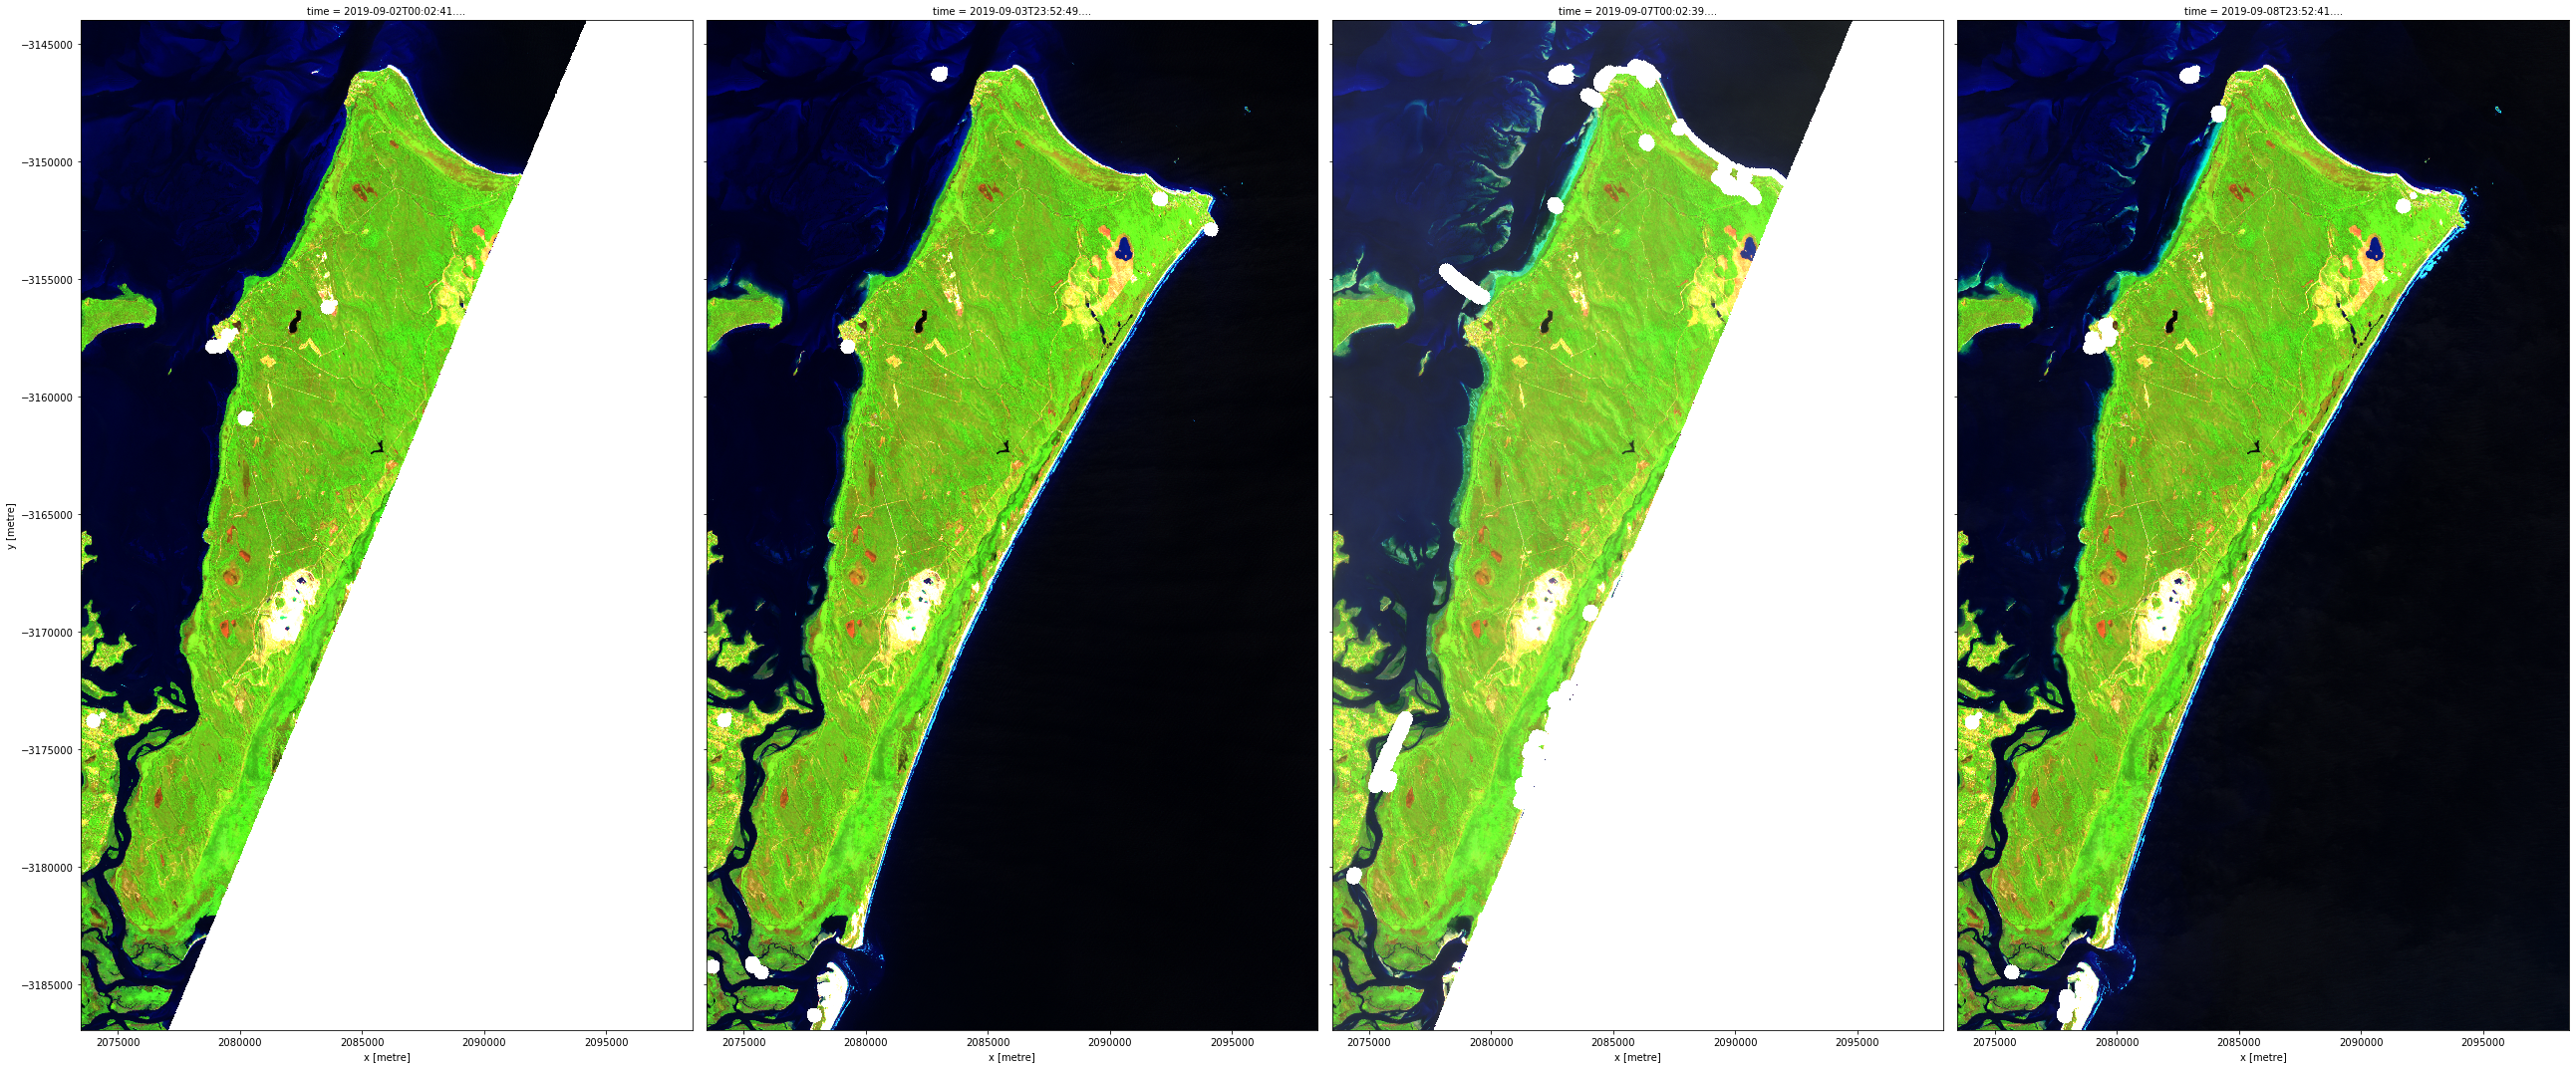

In [57]:
rgb(ds, bands = ['nbart_swir_2','nbart_nir_1','nbart_green'],size =15, col='time')

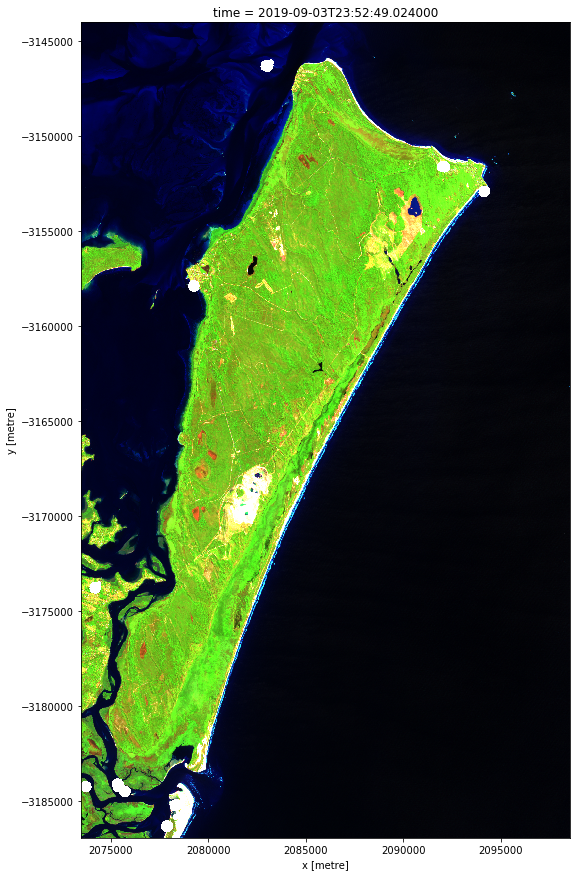

In [58]:
rgb(ds, bands = ['nbart_swir_2','nbart_nir_1','nbart_green'], index=1,size=15)

In [59]:
rgb_tiff = ds.isel(time=1)

In [60]:
write_geotiff('/g/data/r78/rjd547/ARI/imagery_matching/2019-09-04-S2.tif', rgb_tiff)

## Load landsat data for the same period

In [109]:
# Create a reusable query
query2 = {
    'x': (153.39, 153.58),
    'y': (-27.38, -27.74),
    'time': ('2019-08-01', '2019-10-01'),
    'measurements': ['nbart_blue', 'nbart_green','nbart_red', 'nbart_nir','nbart_swir_1','nbart_swir_2'],
    'output_crs': 'EPSG:3577',
    'resolution': (-30, 30),
    'group_by': 'solar_day'
}

In [110]:
dc2 = Datacube(app='Ls8 pixelgrid', env='c3-samples')

In [111]:
# Load available data from Landsat satellites
ds2 = load_ard(dc=dc2,
              products=['ga_ls8c_ard_3'],
              **query2)

Loading ga_ls8c_ard_3 data
    No data for ga_ls8c_ard_3
No data returned for query


## Ok - so no collection 3 data at this location

In [112]:
#dc2.list_measurements()

In [ ]:
dc3 = DEA_notebooks_template.ipynb